In [138]:
import sqlite3
import pandas as pd
import numpy as np
import skycoverage
import matplotlib.pyplot as plt
import json

In [45]:
from matplotlib.patches import Rectangle

def plot_layers(X,Y,image,minra,mindec,ra_width,filter_name,limits=None,plot_base_name='Rubin_targets_'):
    figure_path="./figures/"
    
    filename = "%s%s%s.png" % (figure_path,plot_base_name,filter_name)
    
    result = np.where(image==np.max(image))

    plt.close('all')
    plt.figure()
    if X.all()<0:
        X=X+360
    Z=np.ma.masked_equal(image,0)
    cmp = plt.pcolormesh(X,Y,Z)
    plt.grid()
    
    # Create a Rectangle patch   
    print(minra, mindec, ra_width)
    plt.gca().add_patch(Rectangle((ra-0.75/2.,dec-0.75/2.),0.75,0.75,
                    angle=0,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))
    
    plt.xlim(max(X), min(X))
    plt.ylim(min(Y), max(Y))
    plt.title(f'Rubin {filter_name}')
    #plt.axis('equal')
    plt.xlabel('RA')
    plt.ylabel('DEC')
  #  plt.rcParams['axes.grid'] = False
    plt.colorbar(label='# of Layers')
   # plt.show()
    plt.savefig(filename,dpi=200,facecolor="w")

In [61]:
# Set filepath 
baseline_filepath = './datasets/baseline_v2.0_10yrs.db'
#baseline_filepath = './datasets/rubin_v2.0_cycle_14.db'
# Create a SQL connection to our SQLite database
con = sqlite3.connect(baseline_filepath)

In [62]:
cursor = con.cursor()

In [63]:
# Using SELECT * Returns all results query
sql='''SELECT * FROM OBSERVATIONS'''

In [80]:
# Using SELECT * Returns all results query
sql='''SELECT observationId, fieldRA, fieldDec, 
observationStartMJD, visitExposureTime, filter, rotSkyPos, seeingFwhmEff, skyBrightness FROM OBSERVATIONS '''

In [81]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('observations',), ('info',), ('Proposal',)]


In [82]:
data = pd.read_sql(sql, con)

In [104]:
# Delete all rows where filter = 'y'

data = data[data['filter'] != 'y']

In [85]:
data

,observationId,fieldRA,fieldDec,observationStartMJD,visitExposureTime,filter,rotSkyPos,seeingFwhmEff,skyBrightness
770,770,355.783117,-79.644018,60218.356921,30.0,r,326.536276,2.035976,18.542962
771,771,338.205026,-80.387745,60218.357414,30.0,r,308.756911,1.920335,18.486173
772,772,349.857034,-82.633511,60218.357890,30.0,r,321.456299,1.865481,18.523799
773,773,336.319706,-85.448079,60218.358364,30.0,r,309.454935,1.986832,18.502535
774,774,9.600147,-87.474001,60218.358911,30.0,r,343.903980,2.046160,18.539997
...,...,...,...,...,...,...,...,...,...
2086947,2086947,317.190740,0.447954,63870.089896,30.0,i,171.115865,1.268934,20.119955
2086948,2086948,319.498704,-1.062584,63870.090343,30.0,i,168.772497,1.250927,20.143930
2086949,2086949,324.149588,-4.092218,63870.090797,30.0,i,162.740451,1.273916,20.160632
2086950,2086950,326.501441,-5.607661,63870.091243,30.0,i,159.160192,1.261488,20.177347


In [26]:
sc8_targetfile ='./datasets/targets_rubin_all_sc8_official.json'

In [28]:
rubin_targets_sc8 = json.load(open(sc8_targetfile))

In [29]:
for target in rubin_targets_sc8:
    for k, v in target.items():
        if target[k] is float:
            target[k] = round(float(v),6)

In [30]:
target.keys()

dict_keys(['Survey', 'FilterName', 'Id', 'RA', 'Dec', 'ExpTime', 'SeeingFWHM', 'PSFFile', 'MJD-OBS', 'DATE', 'Zeropoints', 'BackgroundMags', 'PA'])

In [155]:
rubin_targets_sc8[0]['Survey']

'LSST'

In [18]:
# Get the following info dict_keys(['FilterName', 'Id', 'RA', 'Dec', 'ExpTime', 'SeeingFWHM', 'PSFFile', 'MJD-OBS', 'DATE', 'Zeropoints', 'BackgroundMags', 'PA'])

In [19]:
# 'observationId', 'fieldRA', 'fieldDec', 'observationStartMJD', 'visitExposureTime', 'filter', 'rotSkyPos', 'seeingFwhmEff',

231.65239775 30.4257185


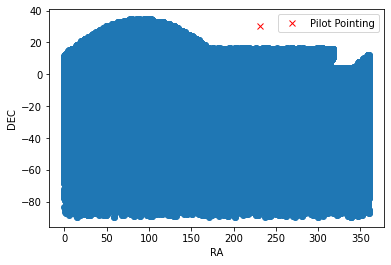

In [93]:
# Euclid pointings
euclid_pointings=[(232.206456, 30.240056),
 (231.812144, 31.196085),
 (231.466027, 30.48791),
 (231.124964, 29.778823)]

ra=[]
dec=[]
#compute centroid of euclid pilot pointings
for index, euc_pointing in enumerate(euclid_pointings):
    ra.append(euc_pointing[0])
    dec.append(euc_pointing[1])    
print(np.mean(ra), np.mean(dec))
pilot_pointing = [np.mean(ra), np.mean(dec)]
plt.plot(data['fieldRA'],data['fieldDec'], 'o')
plt.plot(pilot_pointing[0],pilot_pointing[1] , 'rx', label='Pilot Pointing')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend()

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([5.90633443e-04, 1.80058481e+00, 3.60057898e+00, 5.40057316e+00,
        7.20056734e+00, 9.00056151e+00, 1.08005557e+01, 1.26005499e+01,
        1.44005440e+01, 1.62005382e+01, 1.80005324e+01, 1.98005266e+01,
        2.16005207e+01, 2.34005149e+01, 2.52005091e+01, 2.70005033e+01,
        2.88004974e+01, 3.06004916e+01, 3.24004858e+01, 3.42004800e+01,
        3.60004741e+01, 3.78004683e+01, 3.96004625e+01, 4.14004567e+01,
        4.32004508e+01, 4.50004450e+01, 4.68004392e+01, 4.86004334e+01,
        5.04004276e+01, 5.22004217e+01, 5.40004159e+01, 5.58004101e+01,
        5.76004043e+01, 5.94003984e+01, 6.12003926e+01, 6.30003868e+01,
        6.48003810e+01, 6.66003751e+01, 6.84003693e+01, 7.02003635e+01,
        7.20003577e+01, 7.38003

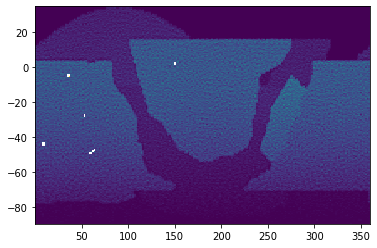

In [94]:
plt.hist2d(data['fieldRA'],data['fieldDec'],bins=200,cmin=0,cmax=400)

In [35]:
#LSST FoV polygon
# Opening JSON file
lsst_filename='./datasets/lsst_polygon.json'

def read_focal_plane(filename):
    with open(filename) as f:
        vertices = json.load(f)
    polygon = np.array(vertices)
    return polygon

lsst_fov=read_focal_plane(lsst_filename)
focalplane = skycoverage.close_polygon(lsst_fov)

In [36]:
# Draw Euclid box
def meas_euclid_box(ctrRA,ctrDec,widthRA):
    hwidth = widthRA/2.0
    minRa = ctrRA + hwidth/np.cos((abs(ctrDec)+hwidth)*np.pi/180.0)
    maxRa = ctrRA - hwidth/np.cos((abs(ctrDec)+hwidth)*np.pi/180.0)
    
    return minRa, maxRa


In [95]:
tol=3
ra=231
dec=-9
euc_box_minRa, euc_box_maxRa = meas_euclid_box(np.mean(ra), np.mean(dec), 0.75)
euc_box_minDec = np.mean(dec) - 0.75/2. - tol
euc_box_maxDec = np.mean(dec) + 0.75/2. + tol
ra_width= euc_box_minRa - euc_box_maxRa
print(ra_width)
print(euc_box_minRa, euc_box_maxRa)
print(euc_box_minDec, euc_box_maxDec)
euc_ra = [euc_box_minRa+tol/2., euc_box_maxRa-tol/2.]
euc_dec = [euc_box_minDec, euc_box_maxDec]
print(euc_ra)
print(euc_dec)

0.7601531126908299
231.38007655634541 230.61992344365459
-12.375 -5.625
[232.88007655634541, 229.11992344365459]
[-12.375, -5.625]


# Select Rubin data within boundaries of Euclid focalplane

In [96]:
rubin_ptgs_df = data[(data['fieldRA'] < euc_ra[0]) & (data['fieldRA'] > euc_ra[1])
                    & (data['fieldDec'] > euc_dec[0]) & (data['fieldDec'] < euc_dec[1])]

<AxesSubplot:>

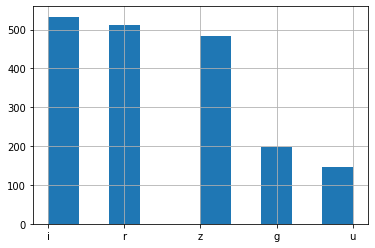

In [97]:
rubin_ptgs_df['filter'].hist()

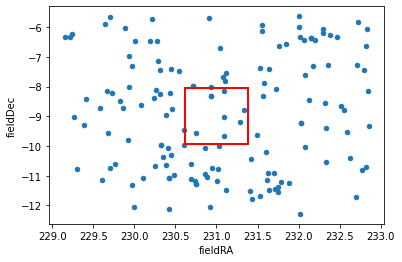

In [98]:
#rubin_ptgs_df.groupby('filter').plot(kind='scatter', x='fieldRA', y='fieldDec')
#rubin_ptgs_df.loc([rubin_ptgs_df.filter==cond['a'],['fieldRA', 'fieldDec']]).plot(kind='scatter', x='fieldRA', y='fieldDec'.format(**cond))
df_u = rubin_ptgs_df.loc[rubin_ptgs_df['filter']=='u']
df_u.plot(kind='scatter', x='fieldRA', y='fieldDec')
plt.gca().add_patch(Rectangle((ra-ra_width/2.,dec-1.875/2.),ra_width,1.875,
                    angle=0,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))

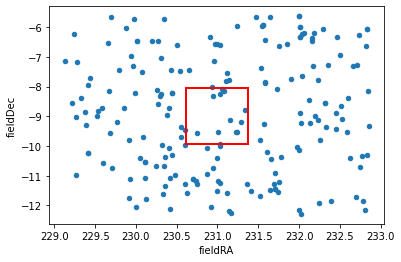

In [99]:
#rubin_ptgs_df.groupby('filter').plot(kind='scatter', x='fieldRA', y='fieldDec')
#rubin_ptgs_df.loc([rubin_ptgs_df.filter==cond['a'],['fieldRA', 'fieldDec']]).plot(kind='scatter', x='fieldRA', y='fieldDec'.format(**cond))
df_g = rubin_ptgs_df.loc[rubin_ptgs_df['filter']=='g']
df_g.plot(kind='scatter', x='fieldRA', y='fieldDec')
plt.gca().add_patch(Rectangle((ra-ra_width/2.,dec-1.875/2.),ra_width,1.875,
                    angle=0,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))

In [100]:
rubin_ptgs_df

,observationId,fieldRA,fieldDec,observationStartMJD,visitExposureTime,filter,rotSkyPos,seeingFwhmEff,skyBrightness
105769,105769,232.340337,-10.696588,60377.393649,30.0,i,236.087601,0.957506,20.201387
105770,105770,230.430099,-8.581386,60377.394097,30.0,i,239.404933,0.967659,20.186066
107443,107443,231.952764,-6.958790,60379.370851,30.0,i,245.058440,1.151104,20.275408
107465,107465,231.952764,-6.958790,60379.382516,30.0,r,254.205058,0.881952,20.977320
107495,107495,230.296529,-9.467088,60379.396567,30.0,r,269.851040,1.123513,20.872645
...,...,...,...,...,...,...,...,...,...
2058974,2058974,231.477967,-6.049258,63822.087519,30.0,i,306.261323,1.422618,18.830961
2059023,2059023,231.843338,-11.639944,63822.110779,30.0,z,311.110047,1.693700,18.409282
2059024,2059024,231.477967,-6.049258,63822.111229,30.0,z,308.297552,1.793360,18.319246
2069874,2069874,230.670972,-9.824640,63836.973176,30.0,r,299.871468,0.967124,20.090204


u
Number of layers 69 >= 15
231.38007655634541 -9.375 0.7601531126908299
g
Number of layers 94 >= 10
231.38007655634541 -9.375 0.7601531126908299
r
Number of layers 243 >= 10
231.38007655634541 -9.375 0.7601531126908299
i
Number of layers 238 >= 10
231.38007655634541 -9.375 0.7601531126908299
z
Number of layers 214 >= 15
231.38007655634541 -9.375 0.7601531126908299


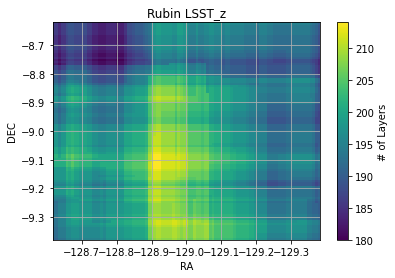

In [103]:
from layers import get_layers

tol=0.
ra=ra
dec=dec
euc_box_minRa, euc_box_maxRa = meas_euclid_box(ra,dec,0.75)
euc_box_minDec = dec - 0.75/2. - tol
euc_box_maxDec = dec + 0.75/2. + tol

euc_ra = [euc_box_minRa+tol/2., euc_box_maxRa-tol/2.]
euc_dec = [euc_box_minDec, euc_box_maxDec]

xmin, ymin, xmax, ymax = euc_ra[1], euc_dec[0], euc_ra[0], euc_dec[1]
ra_width= np.abs(euc_ra[1]-euc_ra[0])

xmin = xmin - 360 if xmin > 180 else xmin
xmax = xmax - 360 if xmax > 180 else xmax
extent = xmin, ymin, xmax, ymax

size = (101,101)
filters='ugriz'
layers = {'u':15,'g':10,'i':10,'r':10,'z':15}

for filter in filters:
    filtername=f'LSST_{filter}'
    print(filter)
    targets =[]
    for index, rows in rubin_ptgs_df[(rubin_ptgs_df['filter']==filter)].iterrows():
    # Create list for the current row
        my_list =[rows.fieldRA, rows.fieldDec]

        targets.append(my_list)
    
    X,Y, image = get_layers(extent,size,targets,focalplane)
  
    if np.max(image) <= layers[filter]-1:
        print('layer count {} < {}'.format(np.max(image),layers[filter]))
       # break
    else:
       # print(f'ObsId {obsId}')
        print('Number of layers {} >= {}'.format(np.max(image),layers[filter]))
    
    plot_layers(X,Y,image,euc_ra[0],euc_dec[0],ra_width,filter_name=filtername)

In [105]:
from astropy.coordinates import SkyCoord

In [106]:
from astropy.coordinates import Angle
ang= Angle('0d5m0.0s')
print(ang)
print(Angle('0.5d'))

0d05m00s
0d30m00s


In [107]:
c = SkyCoord([10, 10], [-30, -35], unit="deg")
d = SkyCoord(10, -35, unit="deg")
dist_pair = c.separation(d)


In [108]:
def apply_min_pair_separation(df,ang):
    drop_list = []
    df = df.reset_index()  # make sure indexes pair with number of rows
    for index, row in df.iterrows():
        target = SkyCoord(row['fieldRA'], row['fieldDec'], unit='deg')
        for i_pos in range(index+1, len(df)):
            neighbor = SkyCoord(df['fieldRA'].loc[i_pos], df['fieldDec'].loc[i_pos], unit='deg')
            dist = target.separation(neighbor)
            if dist < Angle(ang):
                #print(df_g['observationId'].loc[i_pos])
                drop_list.append(df['observationId'].loc[i_pos])
                
    df = df[~df.observationId.isin(drop_list)]
    return df

In [109]:
def drop_min_pair_separation(pt1,pt2,ang):
    print(pt1[0])
    target = SkyCoord(pt1[0],pt1[1], unit='deg')
    neighbor = SkyCoord(pt2[0],pt2[1], unit='deg')
    dist = target.separation(neighbor)
    if dist < Angle(ang):
        return target
    else:
        return target, neighbor

In [110]:
def select_rubin_targets_in_euc_fov(df, ra, dec):
    tol=1.8

    euc_box_minRa, euc_box_maxRa = meas_euclid_box(ra, dec, 0.75)
    euc_box_minDec = dec - 0.75/2. - tol
    euc_box_maxDec = dec + 0.75/2. + tol
    ra_width= euc_box_minRa - euc_box_maxRa

    euc_ra = [euc_box_minRa+tol/2., euc_box_maxRa-tol/2.]
    euc_dec = [euc_box_minDec, euc_box_maxDec]
       
    rubin_ptgs_df = df[(df['fieldRA'] < euc_ra[0]) & (df['fieldRA'] > euc_ra[1])
                    & (df['fieldDec'] > euc_dec[0]) & (df['fieldDec'] < euc_dec[1])]
    
    sub_df = rubin_ptgs_df.groupby('filter').apply(lambda x: apply_min_pair_separation(x,'0.5d') 
                                           if set(x['filter'].unique()).intersection(set(['g','r','i']))
                                                   else apply_min_pair_separation(x,'0.45d') )
    #sub_df = rubin_ptgs_df['filter'].apply(lambda x: apply_min_pair_separation(x,'0.5d') if set(x).intersection(set(['g','r','i'])) else apply_min_pair_separation(x,'0.43d') )

    return sub_df

In [112]:
sub_df = rubin_ptgs_df
S1= set(['g','r', 'i'])
S2 = set(sub_df['filter'].unique())
if S1.intersection(S2):
    print('True')
else:
    print('False')


sub_df['yes_filters'] = sub_df['filter'].apply(lambda x: True if set(x).intersection(set(['g','r','i'])) else False  )

True


<ipython-input-112-761dab913522>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['yes_filters'] = sub_df['filter'].apply(lambda x: True if set(x).intersection(set(['g','r','i'])) else False  )


# Selection of Rubin targets at point in survey footprint

In [113]:
rubin_ra=231
rubin_dec=-9.
test_df = select_rubin_targets_in_euc_fov(data,ra=rubin_ra, dec=rubin_dec)

In [114]:
filters='ugriz'
for filter in filters:
    print(filter, len(test_df[test_df['filter']==filter]))

u 21
g 16
r 15
i 16
z 20


Number of layers 17 >= 15
234.38007655634541 -15.375 6.76015311269083
Number of layers 14 >= 10
234.38007655634541 -15.375 6.76015311269083
Number of layers 13 >= 10
234.38007655634541 -15.375 6.76015311269083
Number of layers 14 >= 10
234.38007655634541 -15.375 6.76015311269083
Number of layers 16 >= 15
234.38007655634541 -15.375 6.76015311269083


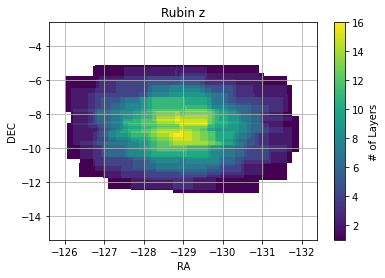

In [137]:
from layers import get_layers
tol=6
ra=rubin_ra
dec=rubin_dec
euc_box_minRa, euc_box_maxRa = meas_euclid_box(ra,dec,0.75)
euc_box_minDec = dec - 0.75/2. - tol
euc_box_maxDec = dec + 0.75/2. + tol
ra_width= euc_box_minRa - euc_box_maxRa

euc_ra = [euc_box_minRa+tol/2., euc_box_maxRa-tol/2.]
euc_dec = [euc_box_minDec, euc_box_maxDec]

xmin, ymin, xmax, ymax = euc_ra[1], euc_dec[0], euc_ra[0], euc_dec[1]
ra_width= np.abs(euc_ra[1]-euc_ra[0])
xmin = xmin - 360 if xmin > 180 else xmin
xmax = xmax - 360 if xmax > 180 else xmax
extent = xmin, ymin, xmax, ymax
size = (201,201)

filters = 'ugriz'
layers = {'u':15,'g':10,'i':10,'r':10,'z':15}
for filter in filters:
    targets = []
    for index, rows in test_df[test_df['filter']==filter].iterrows():
        # Create list for the current row
            my_list =[rows.fieldRA, rows.fieldDec]
            targets.append(my_list)
        
    X,Y, image = get_layers(extent,size,targets,focalplane)
  
    if np.max(image) <= layers[filter]-1:
        print('layer count {} < {}'.format(np.max(image),layers[filter]))
    else:
        print('Number of layers {} >= {}'.format(np.max(image),layers[filter]))
    
    plot_layers(X,Y,image,euc_ra[0],euc_dec[0],ra_width,filter_name=filter,plot_base_name='Orig_full_fp_target_pointings_')

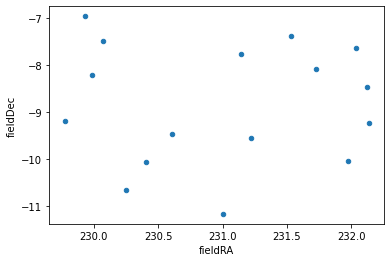

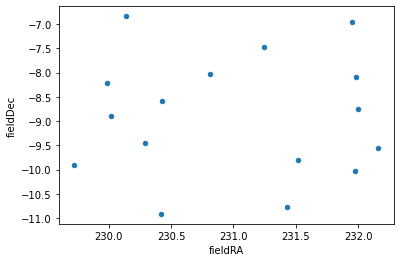

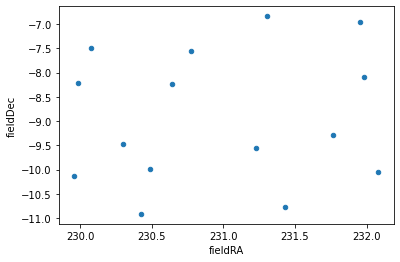

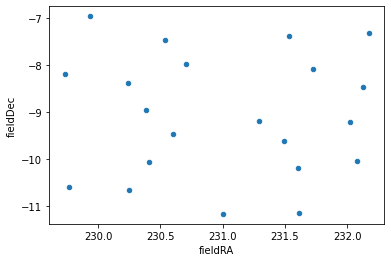

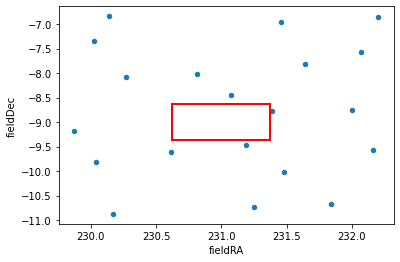

In [118]:
sub_samp = test_df.copy()

sub_samp.reset_index(drop = True, inplace = True)
sub_samp.groupby('filter').plot(kind='scatter', x='fieldRA', y='fieldDec')
plt.gca().add_patch(Rectangle((rubin_ra-0.75/2,dec-0.75/2.),0.75,0.75,
                    angle=0,
                    edgecolor='red',
                    facecolor='none',
                    lw=2))

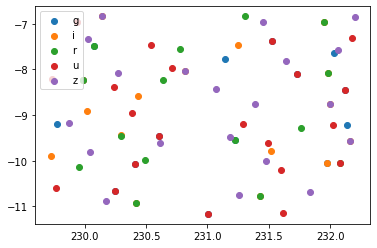

In [119]:
df = test_df.copy()

fig,ax = plt.subplots()
for k,d in df.groupby('filter'):
    ax.scatter(d['fieldRA'], d['fieldDec'], label=k)
plt.legend(loc=2)
#plt.savefig('scatter.png')
plt.show()


# Translate Rubin_RA and Rubin_DEC to "Pilot-Phase Pointing"

In [139]:
def differential_metric_scale(y0,y1):
    return np.abs(np.cos(np.deg2rad(y0)))/np.abs(np.cos(np.deg2rad(y1))) #1/np.cos(np.deg2rad(y1))  #np.abs(np.cos(y0))/np.abs(np.cos(y1))

def metric_scale(y):
	return 1/np.abs(np.cos(np.deg2rad(y)))

def to_tangent_plane(p):
	return [p[0] / metric_scale(p[1]), p[1]]

def move(rubin_target_ptg,pointings0,dx,dy):
    vector = [dx,dy]
  
    barycenter0 = rubin_target_ptg #compute_barycenter(pointings0)
    barycenter1 = np.array(barycenter0) + np.array(vector)

    relative_pointings = np.subtract(pointings0,np.array(barycenter0))
    #relative_pointings = [to_tangent_plane(p) for p in relative_pointings]
    print('relative_pointings', relative_pointings)
    
    pointings1 = []
   
    for p in relative_pointings:
        y0 = barycenter0[1]
        y1 = barycenter1[1]
     #   print(y0,y1)
        pt1 = [barycenter1[0] + p[0] * differential_metric_scale(y0,y1),
                barycenter1[1] + p[1]]
        pointings1.append(pt1)

    return pointings1 

### Compute displacements between original and new coordinates

In [140]:
rubin_pointing =[rubin_ra,rubin_dec]
# barycenter is my euclid-pointing
dx = pilot_pointing[0]-rubin_pointing[0]
dy = pilot_pointing[1]-rubin_pointing[1]
print('pp', pilot_pointing)

#new_targets_df = test_df.apply(move(rubin_pointing,np.array(list(zip(test_df['fieldRA'],test_df['fieldDec']))),dx,dy))
new_test_targets_df = test_df.copy()
new_test_targets_df[["fieldRA", "fieldDec"]] = move(rubin_pointing,np.array(list(zip(test_df['fieldRA'].copy(),test_df['fieldDec'].copy()))),dx,dy) 

pp [231.65239775, 30.4257185]
relative_pointings [[-1.01381362  0.7777004 ]
 [-0.92644182  1.50610558]
 [-0.59242003 -1.06462064]
 [ 0.22502618 -0.54499849]
 [-1.06615185  2.03228001]
 [-0.39670199 -0.4564114 ]
 [ 1.13770042 -0.22287698]
 [-0.75223142 -1.6617377 ]
 [ 0.97569466 -1.03786193]
 [ 0.00275792 -2.16297198]
 [ 0.14052884  1.23381729]
 [ 0.7279757   0.9035967 ]
 [ 1.03491036  1.35658921]
 [ 0.52951314  1.61136292]
 [ 1.12470924  0.54047191]
 [-1.22821371 -0.1942964 ]
 [-0.56990136  0.41861429]
 [ 0.95276373  2.04121008]
 [-0.70705545 -0.44312447]
 [ 0.43140303 -1.77661778]
 [-0.18581121  0.97310635]
 [-1.01381362  0.7777004 ]
 [-0.57965464 -1.91494156]
 [ 0.98174415  0.91136214]
 [-1.27906452 -0.90095273]
 [-0.8598878   2.16120427]
 [ 0.99968304  0.25191621]
 [ 0.24701558  1.53083847]
 [-0.98335847  0.09465238]
 [ 1.16356324 -0.56067437]
 [ 0.51634395 -0.79647868]
 [ 0.97569466 -1.03786193]
 [ 0.95276373  2.04121008]
 [-0.70347139 -0.4670884 ]
 [ 0.43140303 -1.77661778]
 [-1.0

In [122]:
new_test_targets_df

,index,observationId,fieldRA,fieldDec,observationStartMJD,visitExposureTime,filter,rotSkyPos,seeingFwhmEff,skyBrightness
0,125684,125684,230.491146,31.203419,60404.366295,30.0,g,202.410736,0.982375,21.692410
1,150985,150985,230.591224,31.931824,60432.260807,30.0,g,242.162882,1.051348,21.340194
2,151828,151828,230.973822,29.361098,60433.194087,30.0,g,195.430786,0.950162,21.918468
3,172117,172117,231.910149,29.880720,60488.077097,30.0,g,112.363178,1.389865,21.982470
4,321386,321386,230.431196,32.457999,60791.193240,30.0,g,191.134513,1.268591,21.930296
...,...,...,...,...,...,...,...,...,...,...
83,377365,377365,232.389269,31.613259,60904.020785,30.0,z,215.208833,1.206463,19.180575
84,389243,389243,231.867890,29.955221,60920.047782,30.0,z,184.755313,1.043377,18.416561
85,728287,728287,230.532487,32.082880,61486.386349,30.0,z,213.793266,1.003151,18.251568
86,751830,751830,233.029712,32.580976,61522.331877,30.0,z,279.942129,1.130594,18.961286


In [123]:
import sqlite3
# Create your connection.
con = sqlite3.connect('rubin_v2.0_cycle_14.db')

In [125]:
c = con.cursor()

c.execute('CREATE TABLE IF NOT EXISTS OBSERVATIONS (observationId, fieldRA, fieldDec, observationStartMJD, visitExposureTime, filter, rotSkyPos, seeingFwhmEff, skyBrightness )')
con.commit()

In [126]:
new_test_targets_df.reset_index(drop=True)
new_test_targets_df.to_sql('None', con, if_exists='replace', index = False)

In [127]:
c.execute('''  
SELECT * FROM OBSERVATIONS
          ''')


In [128]:
for row in c.fetchall():
    print (row)

In [129]:
new_test_targets_df = data.copy()

In [131]:
tol=0.0
ra=pilot_pointing[0]
dec=pilot_pointing[1]
euc_box_minRa, euc_box_maxRa = meas_euclid_box(ra,dec,0.75)
euc_box_minDec = dec - 0.75/2. - tol
euc_box_maxDec = dec + 0.75/2. + tol
ra_width= euc_box_minRa - euc_box_maxRa

euc_ra = [euc_box_minRa+tol/2., euc_box_maxRa-tol/2.]
euc_dec = [euc_box_minDec, euc_box_maxDec]

xmin, ymin, xmax, ymax = euc_ra[1], euc_dec[0], euc_ra[0], euc_dec[1]
ra_width= np.abs(euc_ra[1]-euc_ra[0])
xmin = xmin - 360 if xmin > 180 else xmin
xmax = xmax - 360 if xmax > 180 else xmax
extent = xmin, ymin, xmax, ymax
size = (101,101)

filters = 'ugriz'
layers = {'u':15,'g':10,'i':10,'r':10,'z':15}
for filter in filters:
    targets = []
    for index, rows in new_test_targets_df[new_test_targets_df['filter']==filter].iterrows():
        # Create list for the current row
            my_list =[rows.fieldRA, rows.fieldDec]
           
            targets.append(my_list)
        
    X,Y, image = get_layers(extent,size,targets,focalplane)
  
    if np.max(image) <= layers[filter]-1:
        print('layer count {} < {}'.format(np.max(image),layers[filter]))
    else:
        print('Number of layers {} >= {}'.format(np.max(image),layers[filter]))
    
    plot_layers(X,Y,image,euc_ra[0],euc_dec[0],ra_width,filter_name=filter,plot_base_name='new_target_pointings_')

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

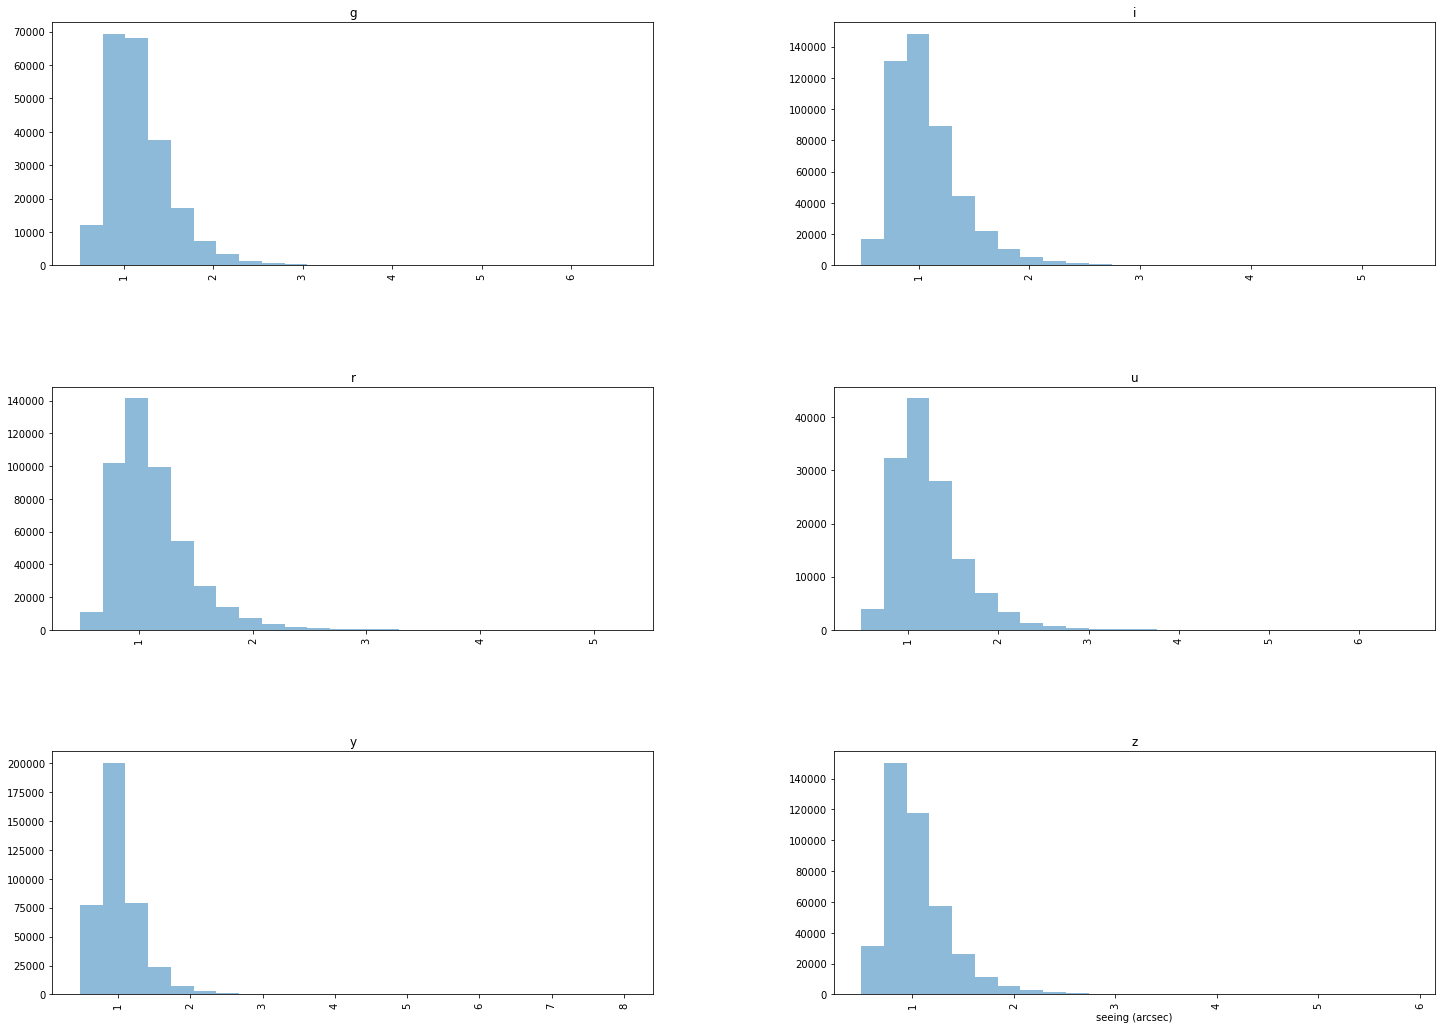

<Figure size 432x288 with 0 Axes>

In [176]:
data['seeingFwhmEff'].hist(by=data['filter'], bins=24, alpha=0.5,figsize=(24, 18))
plt.xlabel('seeing (arcsec)')
plt.figure()

## Calculate the Zeropoints per Visit

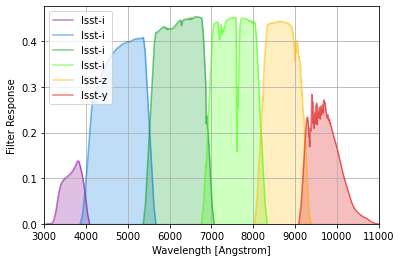

In [19]:
from speclite.filters import load_filter, ab_reference_flux
import speclite
lsst = speclite.filters.load_filters('lsst2019-*')

speclite.filters.plot_filters(
    lsst, wavelength_limits=(3000, 11000), legend_loc='upper left')

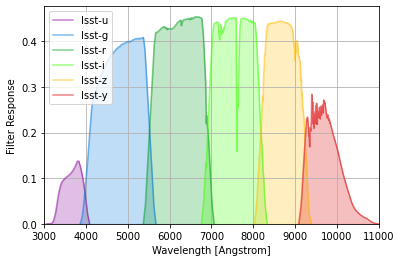

In [20]:
lsst2 = speclite.filters.load_filters('lsst2016-*')

speclite.filters.plot_filters(
    lsst2, wavelength_limits=(3000, 11000), legend_loc='upper left')

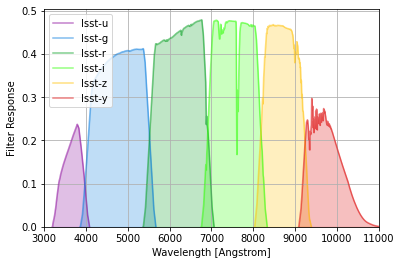

In [24]:
lsst2 = speclite.filters.load_filters('lsst2021-*')

speclite.filters.plot_filters(
    lsst2, wavelength_limits=(3000, 11000), legend_loc='upper left')

In [36]:
from speclite.filters import load_filter, ab_reference_flux
from astropy import units as u

def calculate_zero_point(band_name, B0=24):
    filt = load_filter(band_name)
    return (filt.convolve_with_function(ab_reference_flux) *
            10 ** (-0.4 * B0)).to(1 / (u.s * u.m**2))

In [77]:
lss2019_zp={}
lss2016_zp={}
lss2021_zp={}
filters='ugrizy'
eff_area= 32.4
for filter in filters:
    lss2019_zp[filter]=eff_area*calculate_zero_point('lsst2019-{}'.format(filter))
    lss2016_zp[filter]=eff_area*calculate_zero_point('lsst2016-{}'.format(filter))
    lss2021_zp[filter]=eff_area*calculate_zero_point('lsst2021-{}'.format(filter))
    
                              

In [78]:
for filter in filters:
    print(filter, round(lss2016_zp[filter].value,2), round(lss2019_zp[filter].value,2), round(lss2021_zp[filter].value,2))

u 9.16 9.16 14.87
g 50.7 50.7 54.38
r 43.7 43.7 44.91
i 32.36 32.36 34.4
z 22.68 22.68 23.96
y 10.58 10.58 11.57


In [85]:
WLD2016_zeropoints = np.array([9.16, 50.7, 43.7, 32.36, 22.68, 10.58])
WLD2021_zeropoints = np.array([14.87, 54.38, 44.91, 34.4, 23.96, 11.57])

zp2016 = 2.5*np.log10(WLD2016_zeropoints*10**(-0.4*(0-24)))
zp2021 = 2.5*np.log10(WLD2021_zeropoints*10**(-0.4*(0-24)))

for i in range(6):
    params[f'zenith_fwhm_{bands[i]}']=fwhm_list[i]
    params[f'central_wavelength_{bands[i]}']=central_wavelength[i]
    params[f'sky_brightness_{bands[i]}']=sky_brightness[i]
    params[f'zero_point2016_{bands[i]}'] = zp2016[i]
    params[f'zero_point2021_{bands[i]}'] = zp2021[i]
   
    print(bands[i], round(params[f'zero_point2016_{bands[i]}'],5), round(params[f'zero_point2021_{bands[i]}'],5))

u 26.40474 26.93078
g 28.26252 28.3386
r 28.1012 28.13086
i 27.77502 27.8414
z 27.38911 27.44872
y 26.56121 26.65833


In [23]:
lsst?

Type:        FilterSequence
String form: <speclite.filters.FilterSequence object at 0x16aeabd60>
Length:      6
File:        /usr/local/lib/python3.9/site-packages/speclite/filters.py
Docstring:  
Immutable sequence of filter responses.

Sequences should normally be created by calling :func:`load_filters`.
Objects implement the `immutable sequence
<https://docs.python.org/2/library/collections.html
#collections-abstract-base-classes>`__ API, in addition to the methods
listed here.

A filter sequence's :meth:`get_ab_maggies` and :meth:`get_ab_magnitudes`
methods return their results in a :class:`Table <astropy.table.Table>` and
are convenient for calculating convolutions in several bands for
multiple spectra.  For example, given the following 4 (identical) spectra
covering the SDSS filters:

>>> num_spectra, num_pixels = 4, 500
>>> wlen = np.linspace(2000, 12000, num_pixels) * default_wavelength_unit
>>> flux = np.ones((num_spectra, num_pixels)) * 1e-17 * default_flux_unit

We can now c

In [ ]:
# LOAD throughputs v14 and v1.7
#from astropy.io import ascii
#filters = 'ugrizy'
#lsst2021={}
#t={}
#for filter in filters:
#    lsst2021[filter]='/Users/jenniferpollack/Projects/OU-SIM/throughput-curves/v1.7/lsst_{}_v1.7.dat'.format(filter)
#    t[filter] = ascii.read(lsst2021[filter])

In [22]:
#for filter in filters:
#t[filter].write('lsst2021-{}.ecsv'.format(filter))
#t_r.write('lsstv1p4-r.ecsv')

In [65]:
import galsim
# Values from Ivezic et al 2019
params = dict()
bands = ['u', 'g', 'r', 'i', 'z', 'y']
fwhm_list = [0.81, 0.77, 0.73, 0.71, 0.69, 0.68]
sky_brightness = [22.99, 22.26, 21.20, 20.48, 19.60, 18.61]
ext = [0.491, 0.213, 0.126, 0.096, 0.069, 0.170]
central_wavelength = [3592.13, 4789.98, 6199.52, 7528.51, 8689.83, 9674.05]
WLD_zeropoints = np.array([9.16, 50.70, 43.70, 32.36, 22.68, 10.58]) # Values from WLD using lsst-throughputs
zp = 2.5*np.log10(WLD_zeropoints*10**(-0.4*(0-24)))
for i in range(6):
    params[f'zenith_fwhm_{bands[i]}']=fwhm_list[i]
    params[f'central_wavelength_{bands[i]}']=central_wavelength[i]
    params[f'sky_brightness_{bands[i]}']=sky_brightness[i]
    params[f'zero_point_{bands[i]}'] = zp[i]
params['mirror_diameter']=8.36
params['effective_area']=32.4
params['pixel_scale']=0.2
params['X']=1.2
def get_psf(band, params=params):
    zenith_fwhm = params[f'zenith_fwhm_{band}']
    central_wavelength = params[f'central_wavelength_{band}']
    mirror_diameter = params['mirror_diameter']
    effective_area = params['effective_area']
    px_scale = params['pixel_scale']
    sky_brightness = params[f'sky_brightness_{band}']
    X = params['X']
    atmospheric_psf_fwhm = zenith_fwhm*X**0.6 # Expected FWHM for the atmospheric PSF given the airmass
    atmospheric_psf_model = galsim.Kolmogorov(fwhm = atmospheric_psf_fwhm) # Atmospheric part
    # Set up the optical part
    lambda_over_diameter = 3600*math.degrees(1e-10*central_wavelength/mirror_diameter) # This is tells you the diffraction limit
    area_ratio = effective_area/(math.pi*(0.5*mirror_diameter)**2) 
    obscuration_fraction = math.sqrt(1 - area_ratio) # Part of the mirror is obscured due to the presence of the secondary (that blocks light)
    optical_psf_model = galsim.Airy(lam_over_diam = lambda_over_diameter, obscuration = obscuration_fraction) # Optics part of the PSF
    psf_model = galsim.Convolve(atmospheric_psf_model,optical_psf_model) # total PSF
    return psf_model
def get_flux(mag, band, exposure_time, gain=1.0):
    #Given a magnitude and a zeropoint with exposure time, convert to flux counts
    #the gain can also be specified in GalSim when drawing the profiles
    return 10**(-0.4*(mag-params[f'zero_point_{band}']))*exposure_time*gain

In [69]:
data['observationStartMJD'][0]

60404.366294850384

In [66]:
for i in range(6):
    print(bands[i], params[f'zero_point_{bands[i]}'])

u 26.40473868416963
g 28.262519898333345
r 28.10120359242606
i 27.775021282350593
z 27.389107625552178
y 26.561214169247922


In [67]:
def create_target(data):
    from astropy.Time import Time
    
    return {
        'Survey': data['Survey'],
        'FilterName': data['Filter'],
        'Id': int(data['observationId']),
        'RA': data['fieldRA'],
        'Dec': data['fieldDec'],
        'ExpTime': data['ExpTime'],
        'SeeingFWHM': data['SeeingFWHMEff'],
        'PSFFile': None,
        'MJD-OBS': data['MJD-OBS'],
        'DATE': Time(data['observationStartMJD'], format='mjd'),
        'Zeropoints': gen_zeropoints(filter_name),
        'BackgroundMags': data["skyBrightness"],
        'Rotskypos': 0
    }


t= Time(data_full['observationStartMJD'], format='mjd')

In [156]:
new_test_targets_df.columns

Index(['index', 'observationId', 'fieldRA', 'fieldDec', 'observationStartMJD',
       'visitExposureTime', 'filter', 'rotSkyPos', 'seeingFwhmEff',
       'skyBrightness'],
      dtype='object')

In [157]:
# rename columns and add zeropoint, survey, and Date columns

new_test_targets_df.rename(columns = {'observationId':'Id', 'FilterName':'Filter', 'fieldRA':'RA', 'fieldDec':'Dec', 'visitExposureTime':'ExpTime',
                                     'seeingFwhmEff': 'SeeingFWHM', 'observationStartMJD':'MJD-OBS','skyBrightness':'BackgroundMags'}, inplace = True)

In [160]:
new_test_targets_df.drop('index', inplace=True, axis=1)


Index(['Id', 'RA', 'Dec', 'MJD-OBS', 'ExpTime', 'filter', 'rotSkyPos',
       'SeeingFWHM', 'BackgroundMags'],
      dtype='object')

In [161]:
new_test_targets_df["Survey"] = "LSST"
new_test_targets_df.columns

Index(['Id', 'RA', 'Dec', 'MJD-OBS', 'ExpTime', 'filter', 'rotSkyPos',
       'SeeingFWHM', 'BackgroundMags', 'Survey'],
      dtype='object')

In [163]:
from astropy.Time import Time
new_test_targets_df["DATE"]=Time(data['observationStartMJD'], format='mjd')

ModuleNotFoundError: No module named 'astropy.Time'

In [141]:
# Using area-weighted effective aperture over FOV
# from https://confluence.lsstcorp.org/display/LKB/LSST+Key+Numbers
_rubin_area = 0.25 * np.pi * 649**2    
print(_rubin_area)
delta_zp = 2.5*np.log10(0.95)

x=list(np.random.randn(189)*delta_zp + 27.389107625552178)

330810.49182116863


In [ ]:
#def get_targets_by_filter(targets, filter_name):
#    return [copy.deepcopy(target) for target in targets if target['FilterName'] == filter_name]

for filter_name in 'ugriz':
    print(filter_name, ':', len(get_targets_by_filter(targets, filter_name)))
    
# Using area-weighted effective aperture over FOV
# from https://confluence.lsstcorp.org/display/LKB/LSST+Key+Numbers
_rubin_area = 0.25 * np.pi * 649**2     
    
# Get the mean and stddev of Zeropoints and BackgroundMags for each filter
zp_mean = {}
zp_std = {}

for target in targets:
    filter_name = target['FilterName'][-1:]
    zp = target['Zeropoints']
    bg = target['BackgroundMags']
   

def gen_zeropoints(filter_name):
    return list(np.around(np.random.randn(189)*zp_std[filter_name] + zp_mean[filter_name], 3))


In [142]:
import json

In [ ]:
# rename columns and add zeropoint column

new_teset_targets_df.rename(columns = {'observationId':'Id', 'old_col2':'new_col2'}, inplace = True)

In [152]:
result = new_test_targets_df.to_json(orient="records")

In [153]:
parsed = json.loads(result)

In [154]:
parsed

[{'index': 125684,
  'observationId': 125684,
  'fieldRA': 230.491145705,
  'fieldDec': 31.2034188983,
  'observationStartMJD': 60404.3662948504,
  'visitExposureTime': 30.0,
  'filter': 'g',
  'rotSkyPos': 202.4107363226,
  'seeingFwhmEff': 0.9823751624,
  'skyBrightness': 21.6924101277},
 {'index': 150985,
  'observationId': 150985,
  'fieldRA': 230.591223944,
  'fieldDec': 31.9318240779,
  'observationStartMJD': 60432.2608066389,
  'visitExposureTime': 30.0,
  'filter': 'g',
  'rotSkyPos': 242.1628824706,
  'seeingFwhmEff': 1.0513484833,
  'skyBrightness': 21.3401940189},
 {'index': 151828,
  'observationId': 151828,
  'fieldRA': 230.9738223646,
  'fieldDec': 29.3610978568,
  'observationStartMJD': 60433.1940871503,
  'visitExposureTime': 30.0,
  'filter': 'g',
  'rotSkyPos': 195.4307858923,
  'seeingFwhmEff': 0.9501618301,
  'skyBrightness': 21.918468102},
 {'index': 172117,
  'observationId': 172117,
  'fieldRA': 231.9101493816,
  'fieldDec': 29.8807200085,
  'observationStartMJD'